In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Modelos Multinível com 2 Níveis

Exmplo da aula do MBA DSA USP/ESALQ com Prof. Luiz Fávero

Modelos que reconhecem a existência de estruturas multinível ou hierárquicas. <br>

Melhor previsibilidade em relação aos Modelos OLS


Devemos testar se os termos aleatórios são estatisticamente diferentes de zero.<br> Se forem, os modelos tradicionais OLS não serão adequados.



### Contexto

Base Estudante Escola

Desempenho no vestibular<br>
Quantidade de horas de estudos semanais <br>
Tempo de Experiência médio dos professores na referida escola <br>


In [5]:
df_escola = pd.read_csv(r'bases\estudante_escola.csv')
df_escola['estudante'] = df_escola['estudante'].astype('category')
df_escola['escola'] = df_escola['escola'].astype('category')
df_escola

,estudante,escola,desempenho,horas,texp
0,1,1,25.0,11,3.6
1,2,1,52.0,23,3.6
2,3,1,52.0,25,3.6
3,4,1,30.0,14,3.6
4,5,1,51.0,24,3.6
...,...,...,...,...,...
353,354,10,46.5,28,3.9
354,355,10,21.0,9,3.9
355,356,10,42.0,27,3.9
356,357,10,14.0,7,3.9


# Análise Descritiva

In [4]:
df_escola.describe().round(2)

,desempenho,horas,texp
count,358.00,358.00,358.00
mean,41.55,19.00,5.16
std,23.23,6.37,3.68
min,6.50,4.00,1.90
25%,21.00,14.00,1.90
50%,35.50,20.00,3.60
75%,59.00,24.00,7.50
max,100.00,31.00,13.00


In [6]:
df_escola.groupby('escola')['estudante'].count().reset_index()

,escola,estudante
0,1,47
1,2,25
2,3,48
3,4,20
4,5,48
5,6,30
6,7,28
7,8,35
8,9,44
9,10,33


In [8]:
#Desempenho Médio por Escola
desempenho_medio = df_escola.groupby('escola')['desempenho'].mean().reset_index()
desempenho_medio

,escola,desempenho
0,1,36.765957
1,2,21.400000
2,3,67.125000
3,4,55.325000
4,5,19.270833
5,6,33.966667
6,7,57.532143
7,8,75.428571
8,9,18.556818
9,10,38.590909


### Gráfico Desempenho por Escola

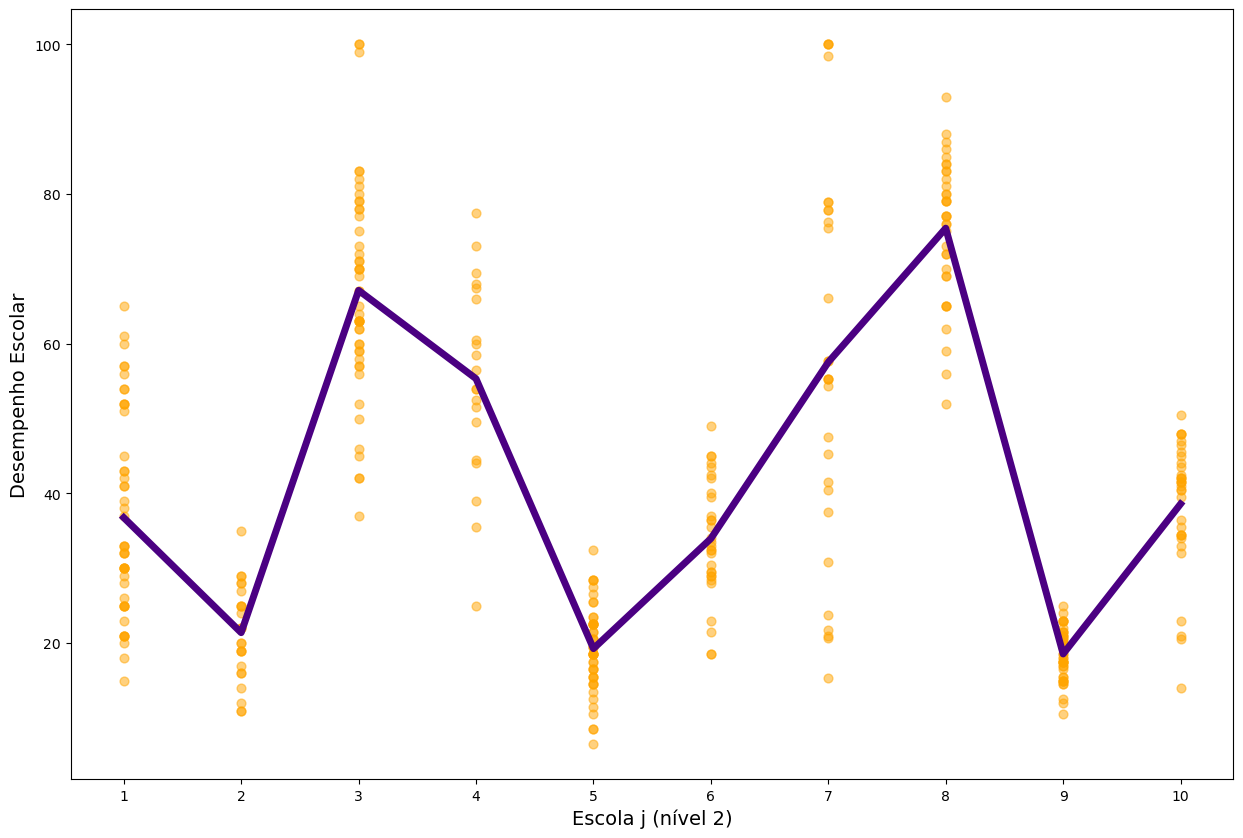

In [10]:
plt.figure(figsize=(15,10))
plt.plot(desempenho_medio['escola'], desempenho_medio['desempenho'],
         linewidth=5, color='indigo')
plt.scatter(df_escola['escola'], df_escola['desempenho'],
            alpha=0.5, color='orange', s = 40)
plt.xlabel('Escola j (nível 2)', fontsize=14)
plt.ylabel('Desempenho Escolar', fontsize=14)
plt.xticks(desempenho_medio.escola)
plt.show()

### Box-plot do Desempenho

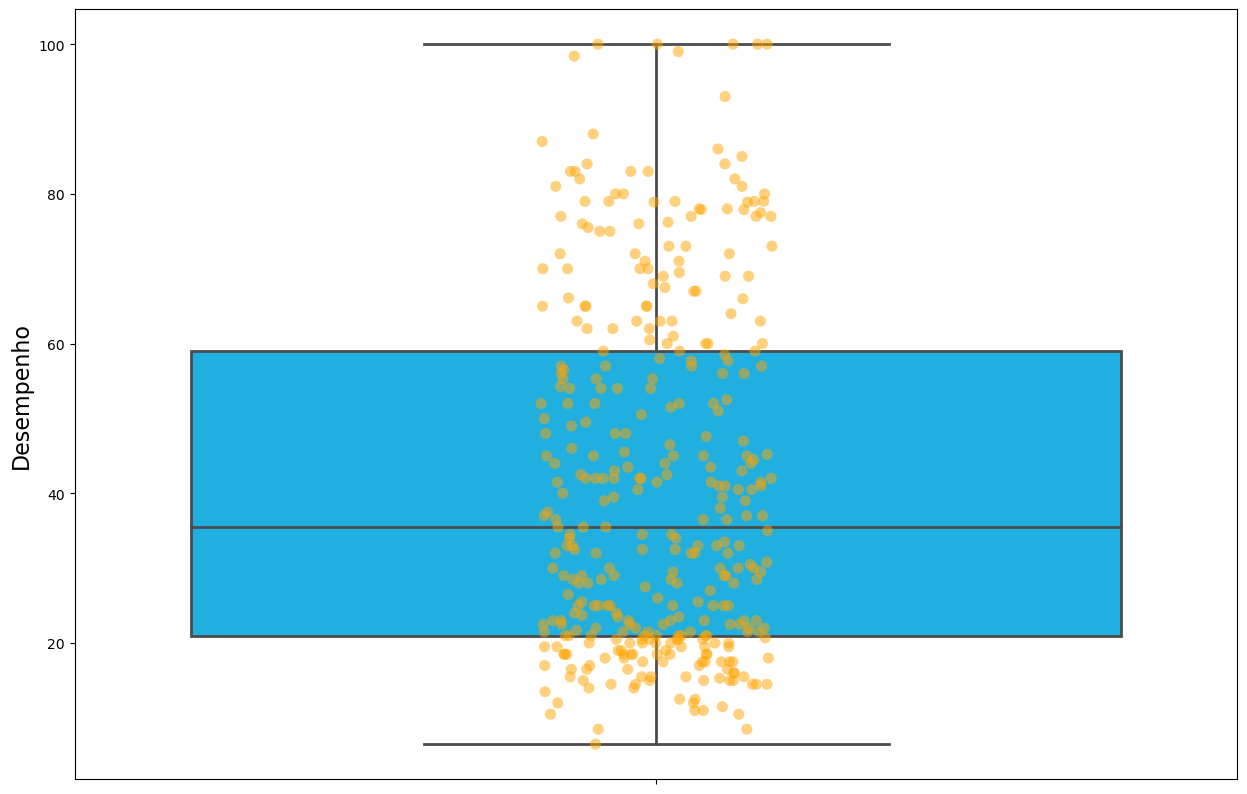

In [11]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df_escola, y='desempenho',
            linewidth=2, orient='v', color='deepskyblue')
sns.stripplot(data=df_escola, y='desempenho',
              color='orange', jitter=0.1, size=8, alpha=0.5)
plt.ylabel('Desempenho', fontsize=16)
plt.show()

### Histograma do Desempenho

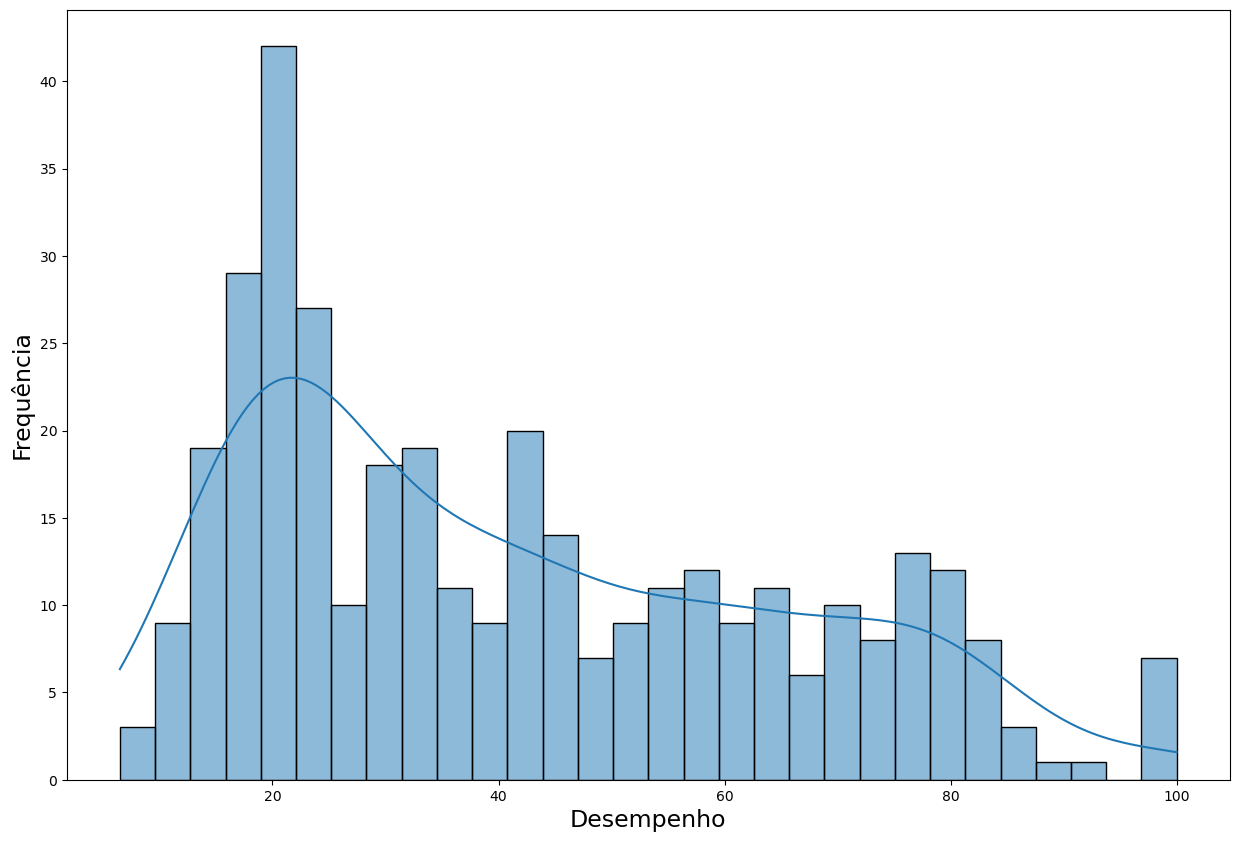

In [14]:
from scipy.stats import norm

plt.figure(figsize=(15,10))
sns.histplot(df_escola.desempenho, kde=True, bins=30)
plt.xlabel('Desempenho', fontsize=17)
plt.ylabel('Frequência', fontsize=17)
plt.show()

### Box-plot Desempenho por Escola

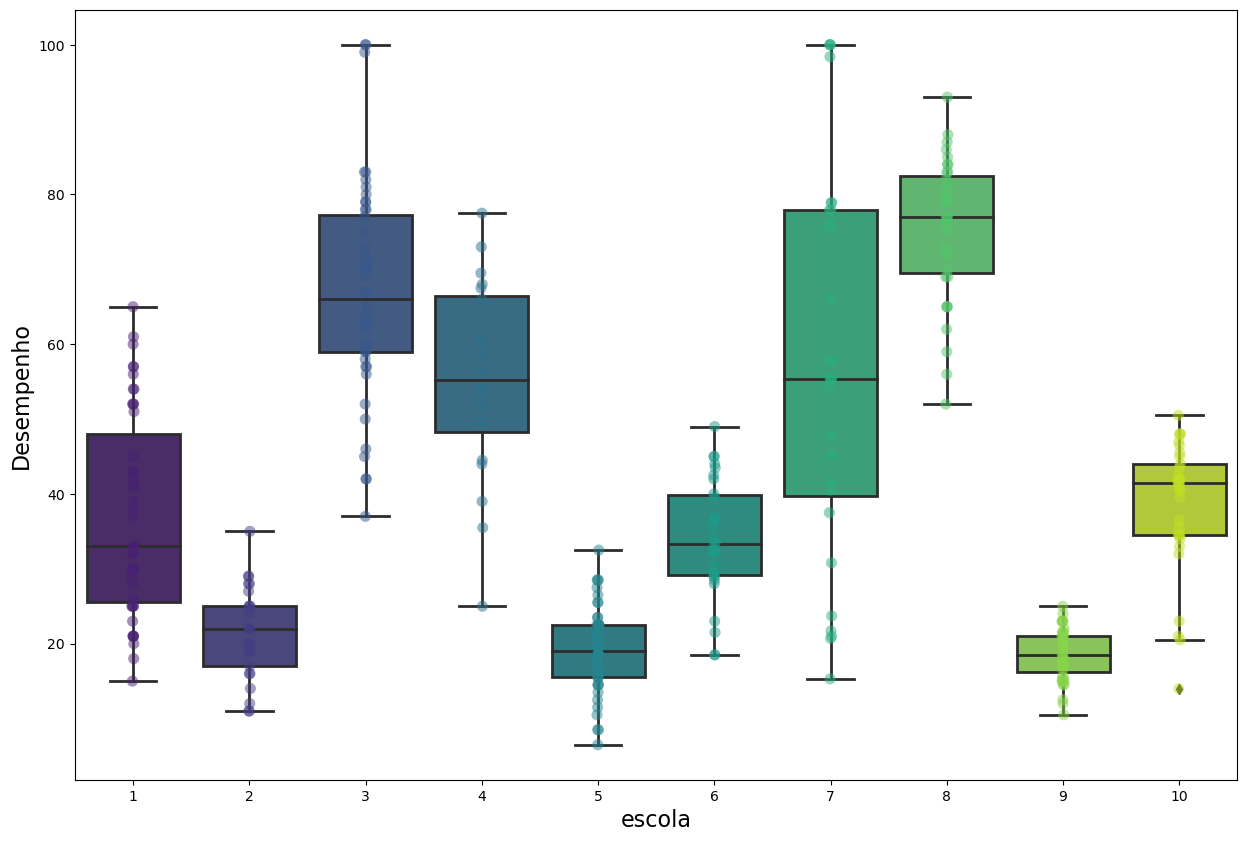

In [15]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df_escola, x='escola', y='desempenho',
            linewidth=2, orient='v', palette='viridis')
sns.stripplot(data=df_escola, x='escola', y='desempenho',
              palette='viridis', jitter=0.01, size=8, alpha=0.5)
plt.ylabel('Desempenho', fontsize=16)
plt.xlabel('escola', fontsize=16)
plt.show()

### Histograma Desempenho por Escola

<Figure size 1500x1000 with 0 Axes>

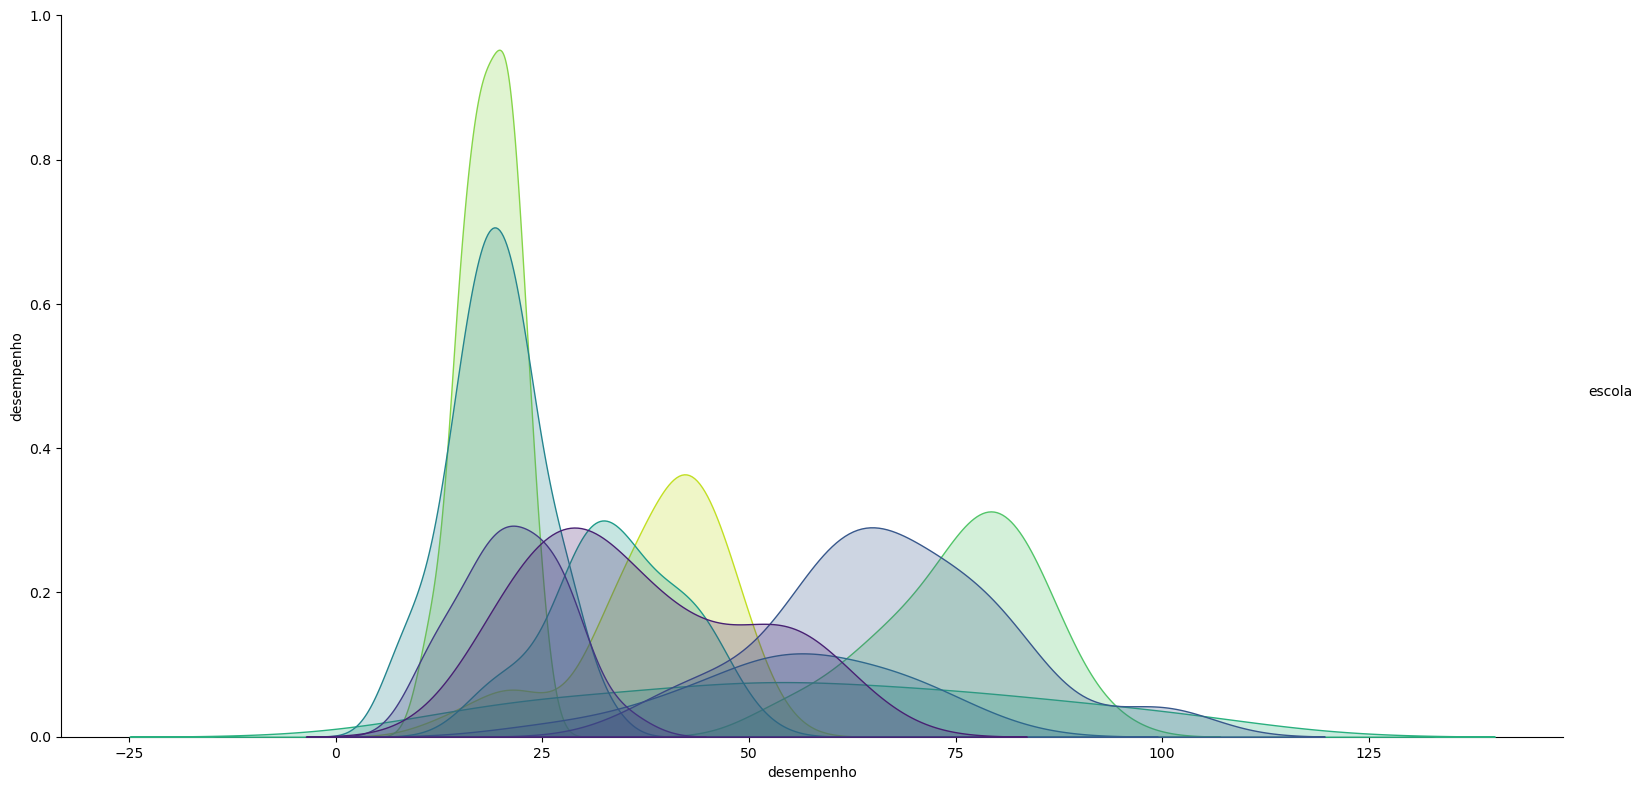

In [38]:
plt.figure(figsize=(15,10))
sns.pairplot(df_escola[['escola','desempenho']], hue='escola', height=8,
             aspect=2, palette='viridis')
plt.xlabel('Desempenho', fontsize=17)
plt.ylabel('Frequência', fontsize=17)
plt.show()

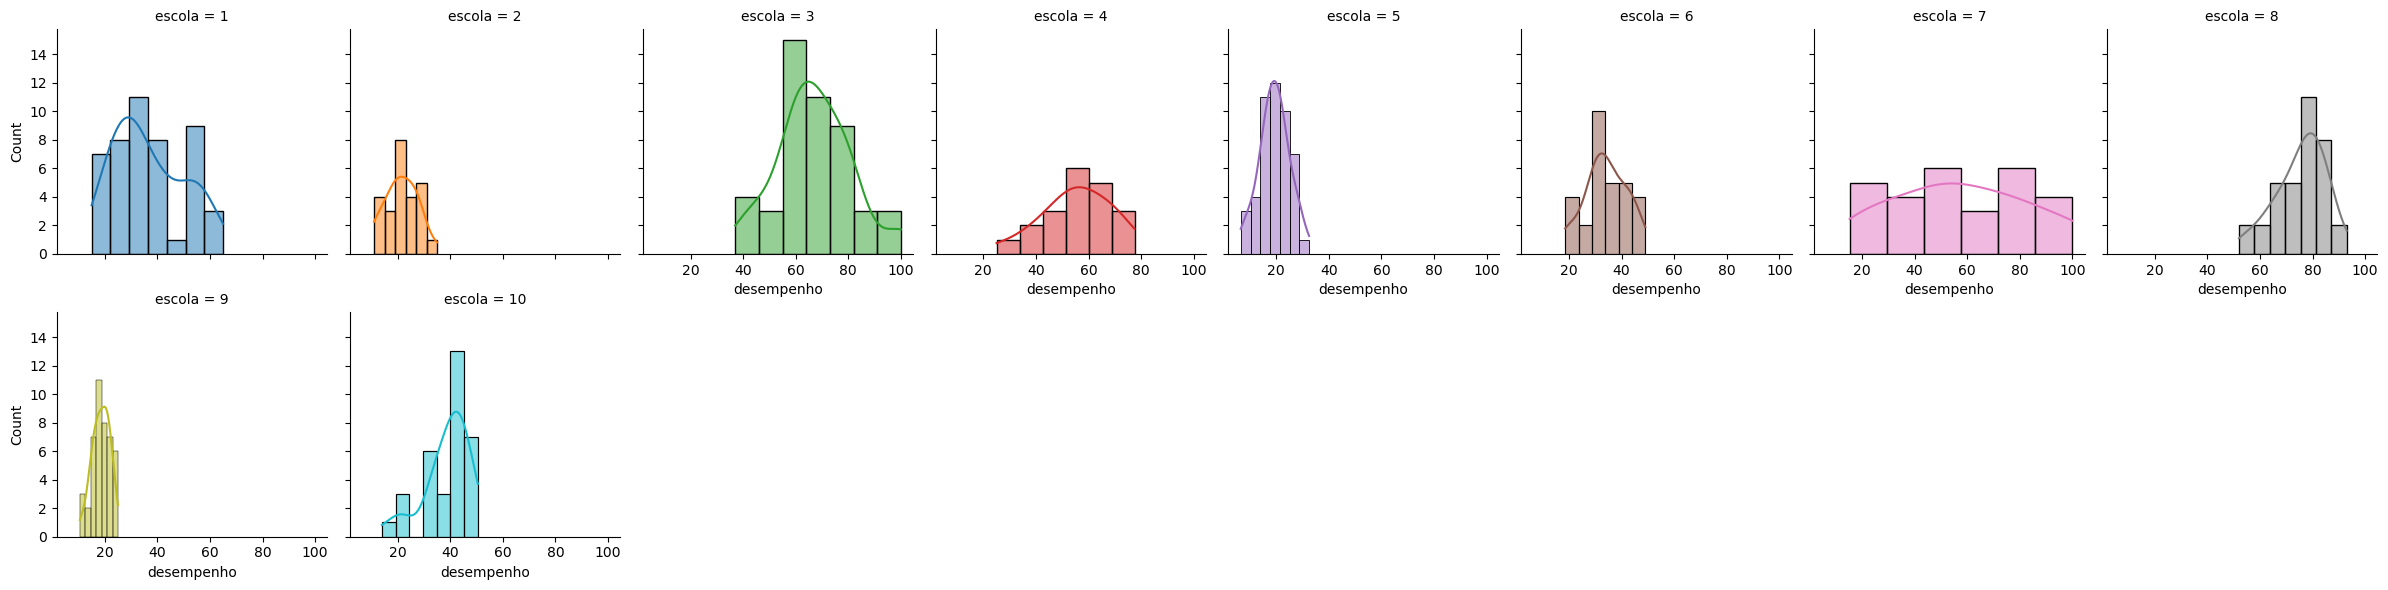

In [17]:
g = sns.FacetGrid(df_escola, col='escola', col_wrap=8, hue='escola')
g.map_dataframe(sns.histplot, kde=True, x='desempenho')
plt.show()

### Gráfico com Desempenho do modelo OLS

### Desempenho x horas

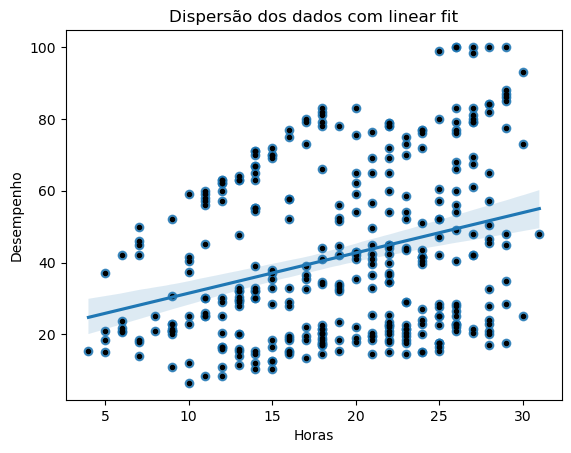

In [11]:
plt.plot(df_escola.horas, df_escola.desempenho, 'o', color='black', markersize=3)
sns.regplot(x="horas", y="desempenho", data=df_escola)
plt.title('Dispersão dos dados com linear fit')
plt.xlabel('Horas')
plt.ylabel('Desempenho')
plt.show()

### Gráfico com Perspectiva Multinível

Captura o comportamento heterocedástico nos dados

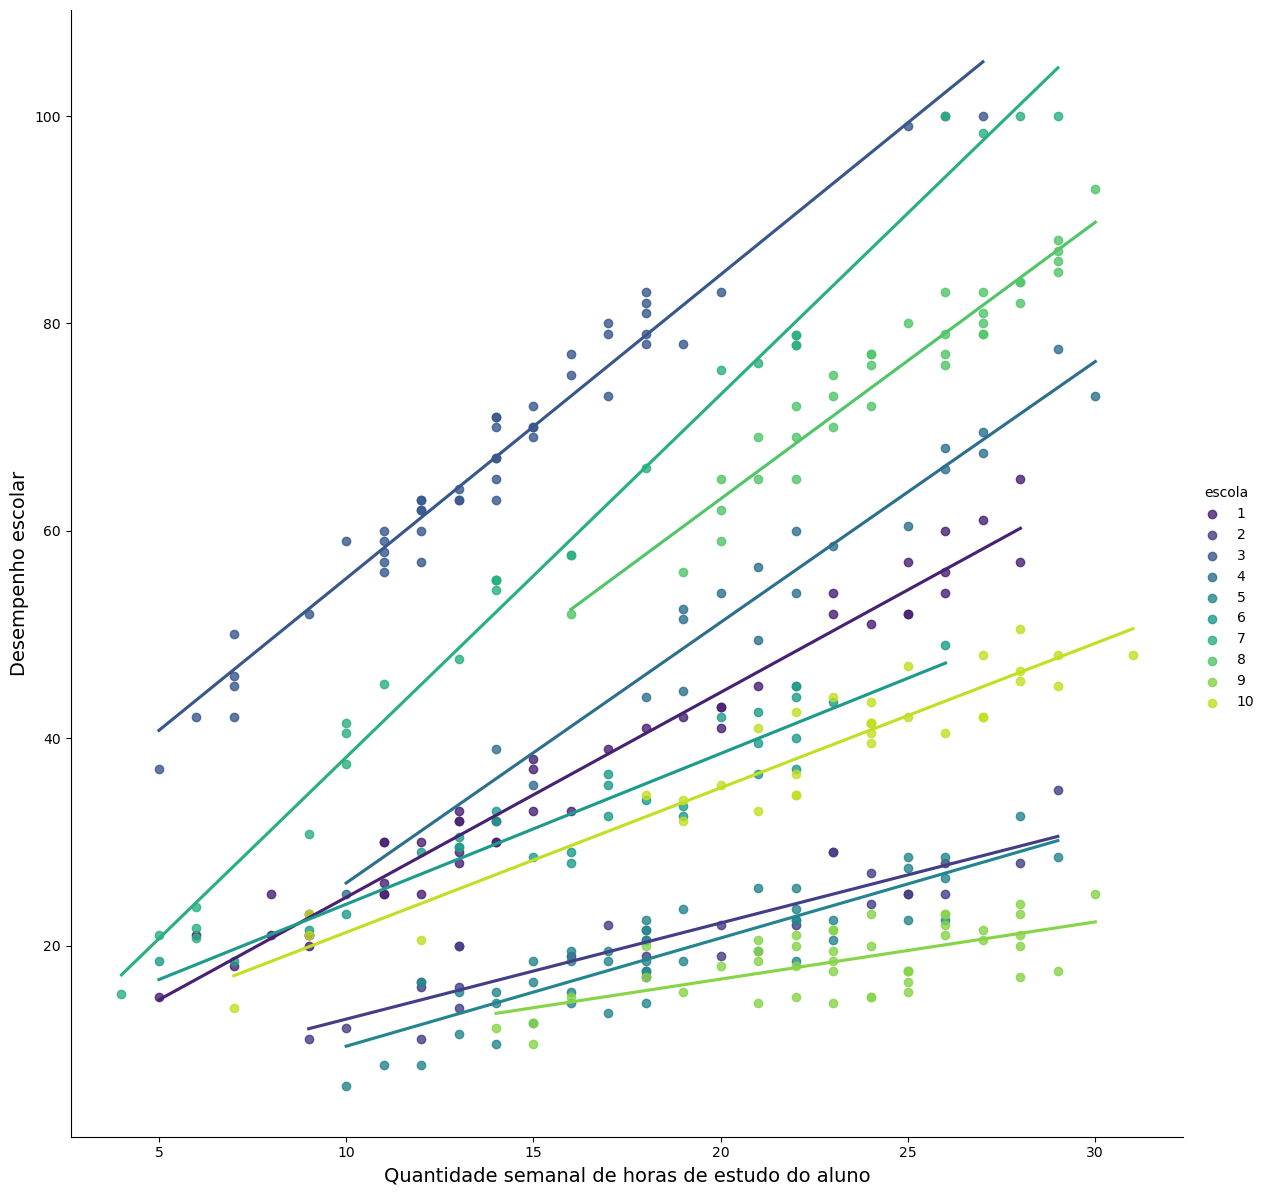

In [19]:
sns.lmplot(x='horas', y='desempenho', data=df_escola, hue='escola',
           ci=False, height=12, palette='viridis')
plt.ylabel('Desempenho escolar', fontsize=14)
plt.xlabel('Quantidade semanal de horas de estudo do aluno',fontsize=14)
plt.show()

# Equação geral do Modelo 


<center><img src='img\eq_geral_modelo.jpg'></center>




# Step-up Strategy

- Análise do Modelo Nulo;
- Análise do Modelo com intercépto Aleatório;
- Análise do Modelo com intercépto e Inclinação aleatória (inclui variável X - define inclinação);

## Estimação do Modelo Nulo

Avaliar o LogLike para verificar se existe significância estatística da variância do efeito aleatório de intercépto. <br>
Caso não tenha, partimos para o modelo OLS

**Testando se os termos aleatórios são estatisticamente diferentes de zero**

se V0j for estatisticamente igual a 0, vale a aplicação do modelo OLS

### Modelo Nulo

Avaliar a importância relativa de cada um dos contextos (no caso escola)

In [20]:
#https://www.statsmodels.org/stable/mixed_linear.html
import statsmodels.api as sm

modelo_nulo_hlm2 = sm.MixedLM.from_formula("desempenho ~ 1", 
                                           df_escola, 
                                           groups='escola',
                                          re_formula = '1').fit()
modelo_nulo_hlm2.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
         Mixed Linear Model Regression Results
========================================================
Model:            MixedLM Dependent Variable: desempenho
No. Observations: 358     Method:             REML      
No. Groups:       10      Scale:              142.9242  
Min. group size:  20      Log-Likelihood:     -1416.0074
Max. group size:  48      Converged:          Yes       
Mean group size:  35.8                                  
--------------------------------------------------------
               Coef.  Std.Err.   z   P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept      42.387    6.468 6.553 0.000 29.709 55.065
escola Var    414.067   16.695                          
========================================================

"""

In [21]:
modelo_nulo_hlm2.pvalues.round(3)

Intercept     0.000
escola Var    0.038
dtype: float64

Modelo:

> DESEMPENHOij = 42,387 + V0j + ERROij

Verificando efeito aleatório de intercepto:
<br>

<center><b>V0j (Group Var) = 414,067 p-value: 0,038</b> </center>

> H0: É estatisticamente significante igual a 0 <br>
> H1: É estatisticamente diferente de 0

p-value < 0,05 rejeita-se H0

Então existem diferenças no desempenho de alunos provenientes de escolas diferentes.

#### ICC (Intraclass Correlation)

Qual a importância relativa do efeito escola sobre o desempenho?

In [14]:
icc = 414.067 / (414.067 + modelo_nulo_hlm2.scale)
icc

0.7433995201093592

**74,34% da variação  do desempenho da nota do vestibular é devido ao efeito escola**

## Comparativo do Ganho de Loglike Entre Modelo Nulo OLS e Modelo Nulo Multinível

In [44]:
#Função para Verificar estatisticamente ganho no LogLike entre os Modelos
from scipy.stats import chi2

def llr_test (model_ref, model_test):
    
    if model_ref == model_test:

        stats_chi2 = -2*(model_ref.llnull - model_test.llf)
        
        return print(f"""LogLike Modelo Nulo: {model_ref.llnull:.2f}
LogLike Modelo: {model_test.llf:.2f}
Estatistica Chi2: {stats_chi2:.2f}
P-value Chi2: {1-chi2.cdf(stats_chi2, df=model_test.df_modelwc)}""")
            
    else:
        
        stats_chi2 = -2*(model_ref.llf - model_test.llf)
        
        return print(f"""LogLike Modelo Ref: {model_ref.llf:.2f}
LogLike Modelo: {model_test.llf:.2f} 
Estatistica Chi2: {stats_chi2:.2f}
P-value Chi2: {1-chi2.cdf(stats_chi2, df=model_test.df_modelwc)}""")

In [40]:
modelo_ols_nulo = sm.OLS.from_formula("desempenho ~ 1", df_escola).fit()
#modelo_ols_nulo.summary()

In [41]:
llr_test(modelo_ols_nulo, modelo_nulo_hlm2)

LogLike Modelo Ref: -1633.49
LogLike Modelo: -1416.01 
Estatistica Chi2: 434.96
P-value Chi2: 0.0


**Apenas com a inclusão do Efeito Aleatório de Intercepto já temos um ganho de LogLike, ou seja, permitir que existam efeitos aleatórios de intercepto no nível escola.** 

Text(0.5, 1.0, 'Comparação do LL')

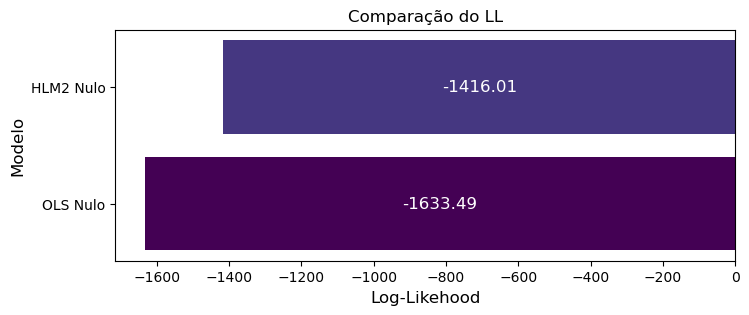

In [48]:
#Definição do dataframe com os modelos e respectivos LL
df_llf = pd.DataFrame({'modelo':['OLS Nulo','HLM2 Nulo'],
                      'loglik':[modelo_ols_nulo.llf,
                                modelo_nulo_hlm2.llf]})
df_llf

#Plotagem propriamente dita
fig, ax = plt.subplots(figsize=(8,3))

c = ["#440154FF", "#453781FF", "#22A884FF", "orange", "green"]

ax1 = ax.barh(df_llf.modelo, df_llf.loglik, color = c)
ax.bar_label(ax1, label_type='center', color='white', fontsize=12)
ax.set_ylabel("Modelo", fontsize=12)
ax.set_xlabel("Log-Likehood", fontsize=12)
plt.title('Comparação do LL')

## Modelo Com Interceptos Aleatórios


Modelo Slide 34

In [49]:
modelo_intercepto_hlm2 = sm.MixedLM.from_formula("desempenho ~ horas", 
                                                 df_escola, 
                                                 groups='escola', 
                                                 re_formula='1').fit()
modelo_intercepto_hlm2.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
         Mixed Linear Model Regression Results
========================================================
Model:            MixedLM Dependent Variable: desempenho
No. Observations: 358     Method:             REML      
No. Groups:       10      Scale:              31.5519   
Min. group size:  20      Log-Likelihood:     -1155.2466
Max. group size:  48      Converged:          Yes       
Mean group size:  35.8                                  
--------------------------------------------------------
              Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept      4.530    7.027  0.645 0.519 -9.243 18.303
horas          1.970    0.056 35.042 0.000  1.859  2.080
escola Var   481.185   40.975                           
========================================================

"""

In [51]:
modelo_intercepto_hlm2.pvalues.round(3)

Intercept     0.519
horas         0.000
escola Var    0.037
dtype: float64

o V0j já se mostrou estatisticamente diferente de zero no modelo nulo, sendo assim existem diferenças no comportamento de alunos provenientes de escolas diferentes. <br>

**Existem diferenças no intercepto dos modelos para cada uma das escolas.**

V0j = 481,18 , p-value 0,037

modelo:

desempenhoij = (4,530 + 1,97 horas)    +     (v0j + Erroij)

                 (EFEITO FIXO) - (EFEITO ALEATÓRIO) 
                   
                 (yhat estudante) -  (efeito escola)

In [52]:
llr_test(modelo_ols_nulo, modelo_intercepto_hlm2)

LogLike Modelo Ref: -1633.49
LogLike Modelo: -1155.25 
Estatistica Chi2: 956.48
P-value Chi2: 0.0


Ganho de LogLike na inclusão de intercépto aleatório com a variável hora

Text(0.5, 1.0, 'Comparação do LL')

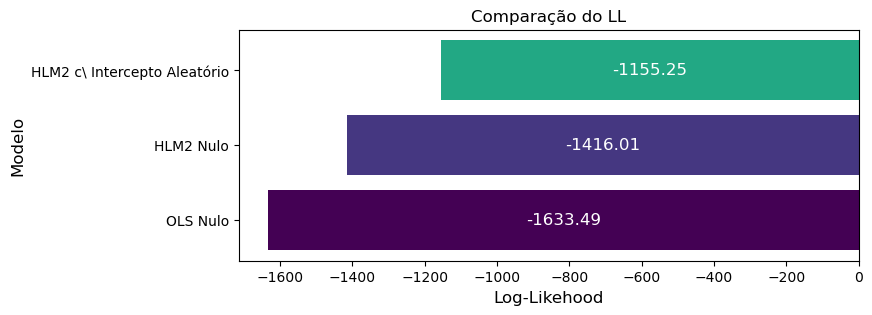

In [54]:
#Definição do dataframe com os modelos e respectivos LL
df_llf = pd.DataFrame({'modelo':['OLS Nulo',
                                 'HLM2 Nulo', 
                                 'HLM2 c\ Intercepto Aleatório'],
                      'loglik':[modelo_ols_nulo.llf,
                                modelo_nulo_hlm2.llf,
                               modelo_intercepto_hlm2.llf]})
df_llf

#Plotagem propriamente dita
fig, ax = plt.subplots(figsize=(8,3))

c = ["#440154FF", "#453781FF", "#22A884FF", "orange", "green"]

ax1 = ax.barh(df_llf.modelo, df_llf.loglik, color = c)
ax.bar_label(ax1, label_type='center', color='white', fontsize=12)
ax.set_ylabel("Modelo", fontsize=12)
ax.set_xlabel("Log-Likehood", fontsize=12)
plt.title('Comparação do LL')

## Modelo Com Interceptos e Inclinação Aleatórios

In [55]:
modelo_intercept_inclin_hlm2 = sm.MixedLM.from_formula("desempenho ~ horas", 
                                                       df_escola, 
                                                       groups='escola', 
                                                       re_formula='horas').fit()
modelo_intercept_inclin_hlm2.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
           Mixed Linear Model Regression Results
============================================================
Model:              MixedLM  Dependent Variable:  desempenho
No. Observations:   358      Method:              REML      
No. Groups:         10       Scale:               7.0497    
Min. group size:    20       Log-Likelihood:      -906.8028 
Max. group size:    48       Converged:           Yes       
Mean group size:    35.8                                    
------------------------------------------------------------
                   Coef.  Std.Err.   z   P>|z| [0.025 0.975]
------------------------------------------------------------
Intercept           7.121    2.426 2.935 0.003  2.366 11.875
horas               1.895    0.308 6.158 0.000  1.292  2.498
escola Var         55.078   10.278                          
escola x horas Cov  2.568    0.986                          
horas Var           0.938    0.170                          
============================================================

"""

In [38]:

# variável dependente
y = df_escola.desempenho

# variável explicativa fixa alunos
x = sm.add_constant(df_escola.horas)

# componente de efeito aleatório de intercepto e inclinação
aleat_incl = sm.add_constant(df_escola.horas)

#
grupo = df_escola.escola


modelo_intercept_inclin_hlm2 = sm.MixedLM(endog = y, 
                                           exog= x, 
                                           exog_re = aleat_incl, 
                                           groups=grupo).fit()
modelo_intercept_inclin_hlm2.summary()


<class 'statsmodels.iolib.summary2.Summary'>
"""
           Mixed Linear Model Regression Results
===========================================================
Model:             MixedLM  Dependent Variable:  desempenho
No. Observations:  358      Method:              REML      
No. Groups:        10       Scale:               7.0497    
Min. group size:   20       Log-Likelihood:      -906.8028 
Max. group size:   48       Converged:           Yes       
Mean group size:   35.8                                    
-----------------------------------------------------------
                  Coef.  Std.Err.   z   P>|z| [0.025 0.975]
-----------------------------------------------------------
const              7.121    2.426 2.935 0.003  2.366 11.875
horas              1.895    0.308 6.158 0.000  1.292  2.498
const Var         55.078   10.278                          
const x horas Cov  2.568    0.986                          
horas Var          0.938    0.170                          
===========================================================

"""

In [56]:
modelo_intercept_inclin_hlm2.pvalues.round(3)

Intercept             0.003
horas                 0.000
escola Var            0.044
escola x horas Cov    0.326
horas Var             0.038
dtype: float64

var(v0j) = const Var = 55,078 p-value 0,044 <br> - efeito aleatório de intercepto

var(v1j) = horas var = 0,938 p-value 0,038 -> p-value < 0,10 existe efeito aleatório de inclinação<br> (flexibiliza para 10% de nível de significância) 



modelo:

**desempenho = 7,12 + 1,89horas + v0j + v1jhoras + erroj**

Text(0.5, 1.0, 'Comparação do LL')

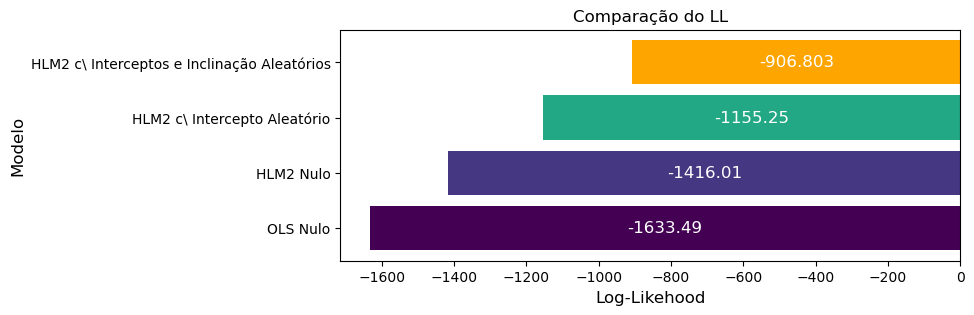

In [57]:
#Definição do dataframe com os modelos e respectivos LL
df_llf = pd.DataFrame({'modelo':['OLS Nulo',
                                 'HLM2 Nulo', 
                                 'HLM2 c\ Intercepto Aleatório', 
                                 'HLM2 c\ Interceptos e Inclinação Aleatórios'],
                      'loglik':[modelo_ols_nulo.llf,
                                modelo_nulo_hlm2.llf, 
                                modelo_intercepto_hlm2.llf, 
                                modelo_intercept_inclin_hlm2.llf]})
df_llf

#Plotagem propriamente dita
fig, ax = plt.subplots(figsize=(8,3))

c = ["#440154FF", "#453781FF", "#22A884FF", "orange", "green"]

ax1 = ax.barh(df_llf.modelo, df_llf.loglik, color = c)
ax.bar_label(ax1, label_type='center', color='white', fontsize=12)
ax.set_ylabel("Modelo", fontsize=12)
ax.set_xlabel("Log-Likehood", fontsize=12)
plt.title('Comparação do LL')

# Modelo Final Incluindo Variável W

Variável de Contexto (se altera entre escolas e não entre indivíduos)

Permite que a variável W tente explicar as diferenças de intercepto e de inclinação entre alunos de escolas diferentes.

A variável de tempo de experiência (texp) dos professores faz com que estudantes de escolas com texp maiores já partam de valores iniciais de desempenho independente das horas de estudo ?

Alunos em escolas com professores com tempo de experiência maiores tem uma taxa de crescimento no desempenho maiores a medida que estudam mais? Uma inclinação da reta maior.

Equação do modelo:
<br>
<br>
<center><img src='img\eq_hlm2_final.jpg'></center>

In [60]:
modelo_final_hlm2 = sm.MixedLM.from_formula(formula="desempenho ~ horas + texp + horas:texp", 
                                                    groups='escola', 
                                                    re_formula='horas',
                                                    data=df_escola).fit()
modelo_final_hlm2.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
            Mixed Linear Model Regression Results
=============================================================
Model:               MixedLM  Dependent Variable:  desempenho
No. Observations:    358      Method:              REML      
No. Groups:          10       Scale:               7.0443    
Min. group size:     20       Log-Likelihood:      -894.5684 
Max. group size:     48       Converged:           Yes       
Mean group size:     35.8                                    
-------------------------------------------------------------
                   Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------
Intercept          -0.850    2.999 -0.283 0.777 -6.727  5.028
horas               0.713    0.321  2.225 0.026  0.085  1.342
texp                1.585    0.487  3.256 0.001  0.631  2.540
horas:texp          0.232    0.053  4.405 0.000  0.129  0.335
escola Var         24.345    5.167                           
escola x horas Cov -2.354    0.514                           
horas Var           0.305    0.059                           
=============================================================

"""

In [61]:
modelo_final_hlm2.pvalues

Intercept             0.776930
horas                 0.026112
texp                  0.001131
horas:texp            0.000011
escola Var            0.075859
escola x horas Cov    0.084448
horas Var             0.053178
dtype: float64

Efeitos Aleatórios

var(v0j) Group var = 24,345 - p-value: 0,076 <- nível de significância flexibilizado para 0,10 <br> 
var(v1j) horas var = 0,305 - p-value: 0,05

Modelo Final

desempenho = -0,85 + 0,713horas + 1,585texp + 0,232horas*textp + v0j + v1j + erroij

### ICC - Intraclass Correlation do Modelo Final

77,78% da variação do desempenho é devido ao efeito escola.

A cada 1 hora adicional de horas tem um aumento 0,713 + 0,23 no desempenho (mantido as demais constantes)

In [62]:
icc = (24.345 + 0.305)/ (24.345 + 0.305 + modelo_final_hlm2.scale)
icc

0.7777411981929008

Text(0.5, 1.0, 'Comparação do LL')

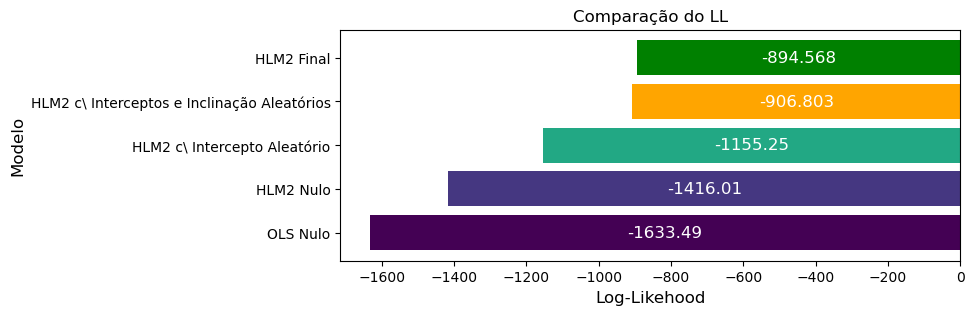

In [63]:
#Definição do dataframe com os modelos e respectivos LL
df_llf = pd.DataFrame({'modelo':['OLS Nulo',
                                 'HLM2 Nulo', 
                                 'HLM2 c\ Intercepto Aleatório', 
                                 'HLM2 c\ Interceptos e Inclinação Aleatórios', 
                                 'HLM2 Final'],
                      'loglik':[modelo_ols_nulo.llf,
                                modelo_nulo_hlm2.llf, 
                                modelo_intercepto_hlm2.llf, 
                                modelo_intercept_inclin_hlm2.llf, 
                                modelo_final_hlm2.llf]})
df_llf

#Plotagem propriamente dita
fig, ax = plt.subplots(figsize=(8,3))

c = ["#440154FF", "#453781FF", "#22A884FF", "orange", "green"]

ax1 = ax.barh(df_llf.modelo, df_llf.loglik, color = c)
ax.bar_label(ax1, label_type='center', color='white', fontsize=12)
ax.set_ylabel("Modelo", fontsize=12)
ax.set_xlabel("Log-Likehood", fontsize=12)
plt.title('Comparação do LL')

## Fitted Values

In [65]:
#exog_fix = df_escola[['horas', 'texp', 'texp_horas']]
df_escola['hlm2_fitted'] = modelo_final_hlm2.fittedvalues

In [66]:
df_escola

,estudante,escola,desempenho,horas,texp,hlm2_fitted
0,1,1,25.0,11,3.6,26.501371
1,2,1,52.0,23,3.6,50.343641
2,3,1,52.0,25,3.6,54.317353
3,4,1,30.0,14,3.6,32.461938
4,5,1,51.0,24,3.6,52.330497
...,...,...,...,...,...,...
353,354,10,46.5,28,3.9,46.397262
354,355,10,21.0,9,3.9,19.776900
355,356,10,42.0,27,3.9,44.996191
356,357,10,14.0,7,3.9,16.974757


In [73]:
#df_predict = df_escola.iloc[:,:3]
df_escola['predict.fixed'] = modelo_final_hlm2.predict()
df_escola['predict.escola'] = modelo_final_hlm2.fittedvalues
df_escola['etjk'] = df_escola['desempenho'] - df_escola['predict.escola']
df_escola

,estudante,escola,desempenho,horas,texp,hlm2_fitted,predict.fixed,predict.escola,etjk
0,1,1,25.0,11,3.6,26.501371,21.885819,26.501371,-1.501371
1,2,1,52.0,23,3.6,50.343641,40.462363,50.343641,1.656359
2,3,1,52.0,25,3.6,54.317353,43.558453,54.317353,-2.317353
3,4,1,30.0,14,3.6,32.461938,26.529955,32.461938,-2.461938
4,5,1,51.0,24,3.6,52.330497,42.010408,52.330497,-1.330497
...,...,...,...,...,...,...,...,...,...
353,354,10,46.5,28,3.9,46.397262,50.625529,46.397262,0.102738
354,355,10,21.0,9,3.9,19.776900,19.891243,19.776900,1.223100
355,356,10,42.0,27,3.9,44.996191,49.007935,44.996191,-2.996191
356,357,10,14.0,7,3.9,16.974757,16.656055,16.974757,-2.974757


### Visualização dos interceptos aleatórios por escola, para o 'modelo_final_completo_hlm2'

In [68]:
efeitos_aleatorios = pd.DataFrame(modelo_final_hlm2.random_effects).T
efeitos_aleatorios = efeitos_aleatorios.rename(columns = {'escola':'u0j'})
efeitos_aleatorios = efeitos_aleatorios.reset_index().rename(columns={'index': 'escola'})
efeitos_aleatorios

,escola,u0j,horas
0,1,-0.211364,0.438811
1,2,1.291495,-0.278181
2,3,6.090772,-0.779130
3,4,-5.245506,0.450368
4,5,-1.695358,-0.139678
5,6,3.864292,0.005096
6,7,-8.270892,0.909171
7,8,-1.363471,0.217166
8,9,3.705674,-0.607100
9,10,1.834358,-0.216522


## Comportamento dos interceptos aleatórios

- A Escola 7 tem o pior efeito sobre a variável desempenho de seus estudantes (menor efeito de intercepto no nível escola);
- A Escola 3 tem o melhor efeito sobre a variável desemepnho de seus estudantes (maior efeito de intercepto no nível escola);
- Os efeitos aleatórios de intercepto são diferentes entre si e apresentam variância estatisticamente diferente de zero, sendo assim, modelos tradicionais como OLS não fazem sentido.

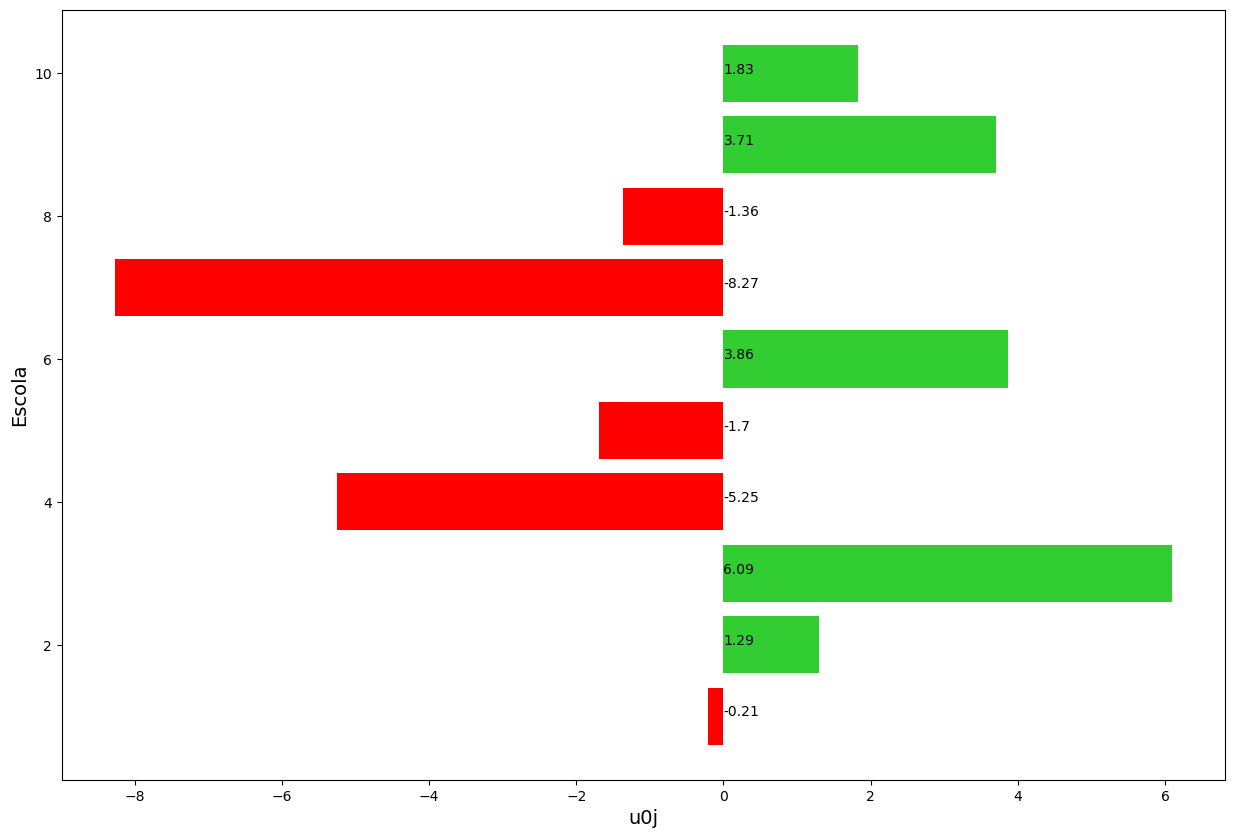

In [69]:
# Gráfico para visualização do comportamento dos valores de u0j, ou seja,
#dos interceptos aleatórios por escola

colors = ['limegreen' if x>0 else 'red' for x in efeitos_aleatorios['u0j']]

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(0, point['y'], str(round(point['x'],2)),fontsize=10)

plt.figure(figsize=(15,10))
plt.barh(efeitos_aleatorios['escola'], efeitos_aleatorios['u0j'], color=colors)

label_point(x = efeitos_aleatorios['u0j'],
            y = efeitos_aleatorios['escola'],
            val = efeitos_aleatorios['u0j'],
            ax = plt.gca()) 
plt.ylabel('Escola', fontsize=14)
plt.xlabel('u0j', fontsize=14)
plt.show()

## Gráfico com Fitted Values do Modelo

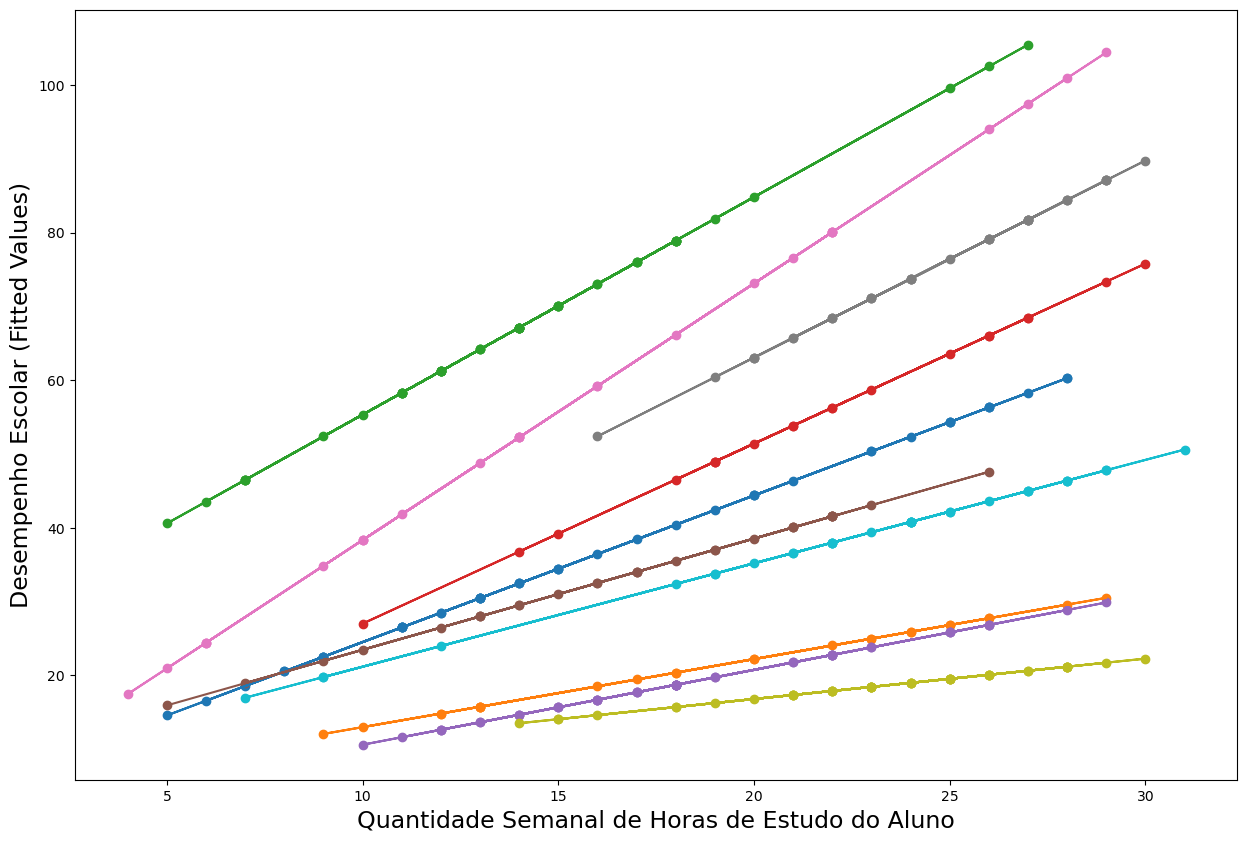

In [74]:
plt.figure(figsize=(15,10))
escolas = df_escola.escola.unique()
[plt.plot(df_escola[df_escola['escola']==escola].horas,
          df_escola[df_escola['escola']==escola]['predict.escola']) for escola in escolas]
[plt.scatter(df_escola[df_escola['escola']==escola].horas,
             df_escola[df_escola['escola']==escola]['predict.escola']) for escola in escolas]
plt.ylabel('Desempenho Escolar (Fitted Values)', fontsize=17)
plt.xlabel('Quantidade Semanal de Horas de Estudo do Aluno', fontsize=17)
plt.show()

## Elaboração de previsões para o 'modelo_final_completo_hlm2':

Exemplo: Quais os valores previstos de desempenho escolar, para dado
aluno que estuda na escola "1", sabendo-se que estuda 11 horas por semana e
que a escola oferece tempo médio de experiência de seus professores igual a
3,6 anos?

In [89]:
# O resultado obtido por meio da função 'predict' só considera efeitos fixos.
# Criação do objeto 'resultado_fixo' apenas com o efeito fixo
resultado_fixo = modelo_final_hlm2.predict(pd.DataFrame({'horas':[11],
                                                         'texp':[3.6],
                                                         'escola':['1']}))
resultado_fixo

0    21.885819
dtype: float64

In [90]:
# A função 'predict' não considera os efeitos aleatórios de intercepto por
#'escola'. Neste sentido, precisamos adicioná-los a partir dos parâmetros do
#'modelo_final_hlm2', conforme segue.


# Efeitos aleatórios de intercepto por 'escola'
pd.DataFrame(modelo_final_hlm2.random_effects)

,1,2,3,4,5,6,7,8,9,10
escola,-0.211364,1.291495,6.090772,-5.245506,-1.695358,3.864292,-8.270892,-1.363471,3.705674,1.834358
horas,0.438811,-0.278181,-0.779130,0.450368,-0.139678,0.005096,0.909171,0.217166,-0.607100,-0.216522


In [91]:
# Criação do objeto 'resultado_aleat_escola1' com o efeito aleatório de intercepto
#da escola 1
resultado_aleat_escola1 = modelo_final_hlm2.random_effects[1]
resultado_aleat_escola1

escola   -0.211364
horas     0.438811
dtype: float64

In [103]:
# Predição completa para o enunciado anterior, com efeitos fixos e aleatórios
#para a escola 1
resultado_total = resultado_fixo.iloc[0] + resultado_aleat_escola1.iloc[0] +\
                    resultado_aleat_escola1.iloc[1]*11 #hora
resultado_total

26.501370736196783

# Comparativo Modelo OLS contra HLM

In [101]:
modelo_ols = sm.OLS.from_formula("desempenho ~ horas + texp", df_escola).fit()
modelo_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             desempenho   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     827.1
Date:                Tue, 02 May 2023   Prob (F-statistic):          2.38e-134
Time:                        21:00:24   Log-Likelihood:                -1323.2
No. Observations:                 358   AIC:                             2652.
Df Residuals:                     355   BIC:                             2664.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -23.3983      1.989    -11.761      0.000     -27.311     -19.486
horas          1.9100      0.084     22.758      0.000       1.745       2.075
texp           5.5545      0.145     38.268      0.000       5.269       5.840
==============================================================================
Omnibus:                        8.245   Durbin-Watson:                   0.719
Prob(Omnibus):                  0.016   Jarque-Bera (JB):                5.073
Skew:                          -0.109   Prob(JB):                       0.0791
Kurtosis:                       2.459   Cond. No.                         79.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.0, 'Comparação do LL')

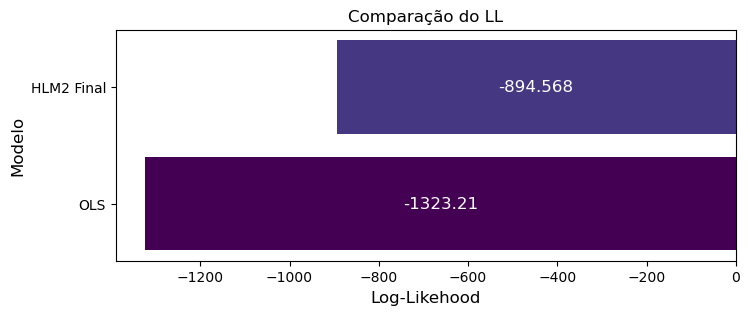

In [102]:
#Definição do dataframe com os modelos e respectivos LL
df_llf = pd.DataFrame({'modelo':['OLS', 
                                 'HLM2 Final'],
                      'loglik':[modelo_ols.llf, 
                                modelo_final_hlm2.llf]})
df_llf

#Plotagem propriamente dita
fig, ax = plt.subplots(figsize=(8,3))

c = ["#440154FF", "#453781FF", "#22A884FF", "orange", "green"]

ax1 = ax.barh(df_llf.modelo, df_llf.loglik, color = c)
ax.bar_label(ax1, label_type='center', color='white', fontsize=12)
ax.set_ylabel("Modelo", fontsize=12)
ax.set_xlabel("Log-Likehood", fontsize=12)
plt.title('Comparação do LL')

In [37]:
llr_test(modelo_ols, modelo_final_hlm2)

LogLike Modelo Ref: -1323.21
LogLike Modelo: -894.57 
Estatistica Chi2: 857.27
P-value Chi2: 0.0


Ganho de LogLike em favor do HLM

## Gráfico OLS vs HLM